In [1]:
import modin.pandas as pd
df = pd.read_csv(r"D:\PyTorch for Deep Learning with Python Bootcamp\1. Course Overview, Installs, and Setup\PYTORCH_NOTEBOOKS\Data\income.csv")
df

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
29995,45,Male,Masters,14,Married,State-gov,Prof-specialty,60,>50K,1
29996,33,Male,HS-grad,9,Married,Private,Machine-op-inspct,40,>50K,1
29997,47,Male,Prof-school,15,Married,Private,Prof-specialty,55,>50K,1
29998,32,Female,Some-college,10,Never-married,Private,Adm-clerical,40,<=50K,0


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (30000, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

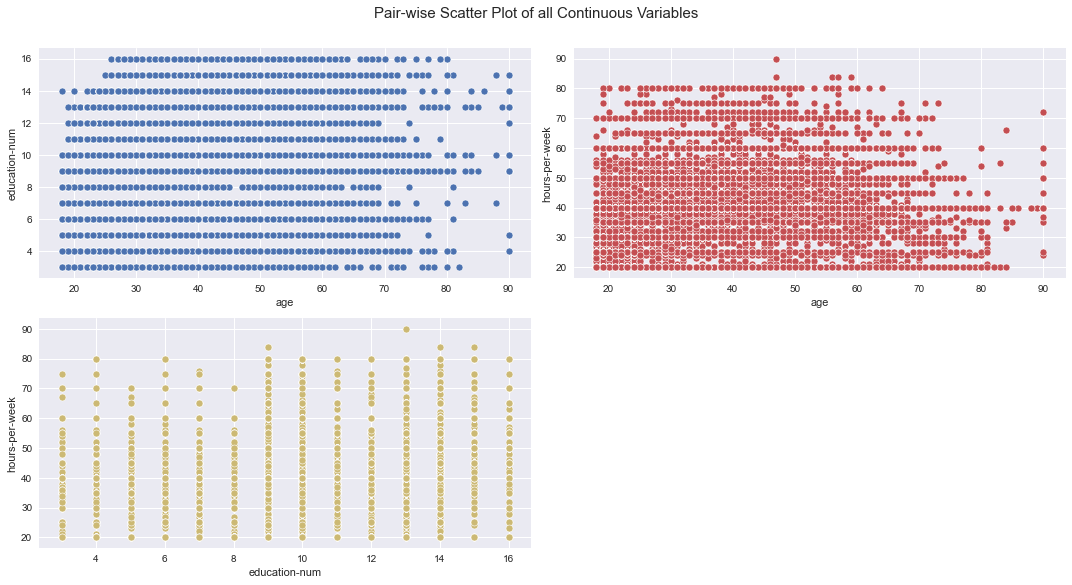

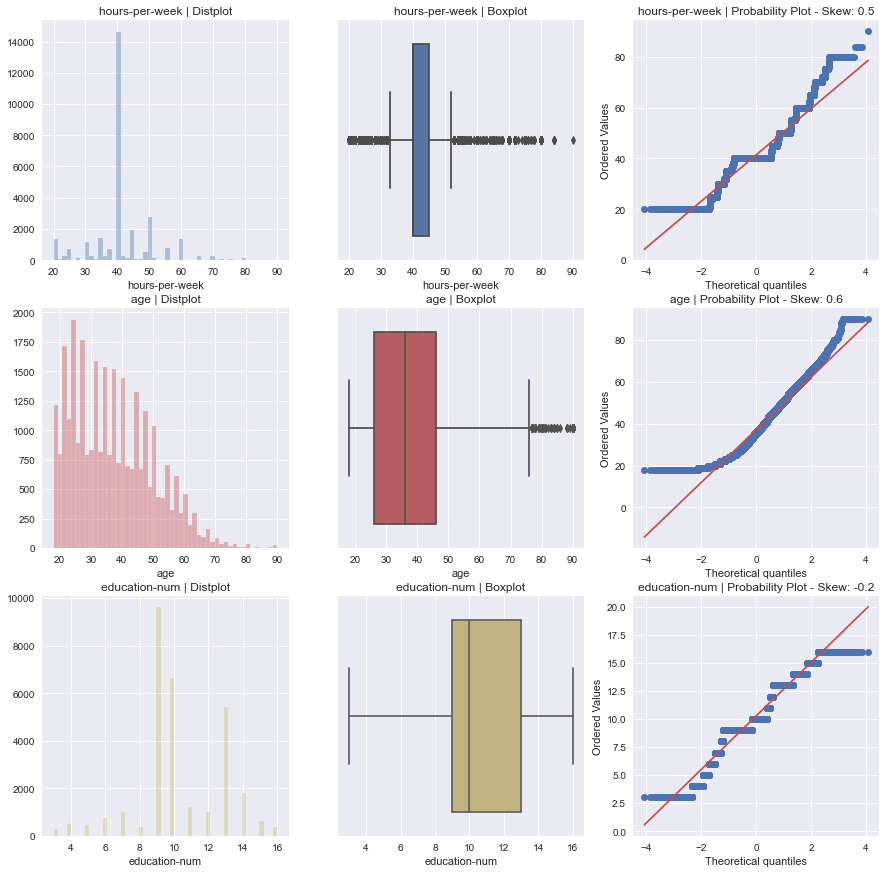

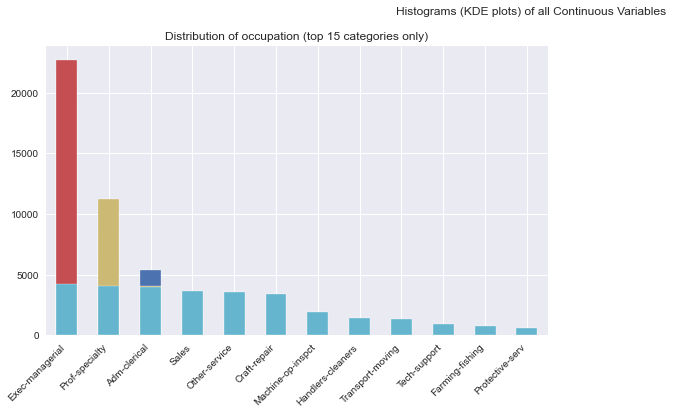

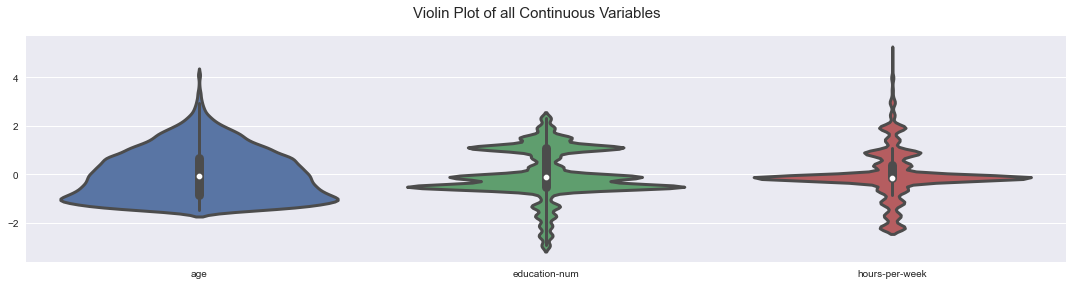

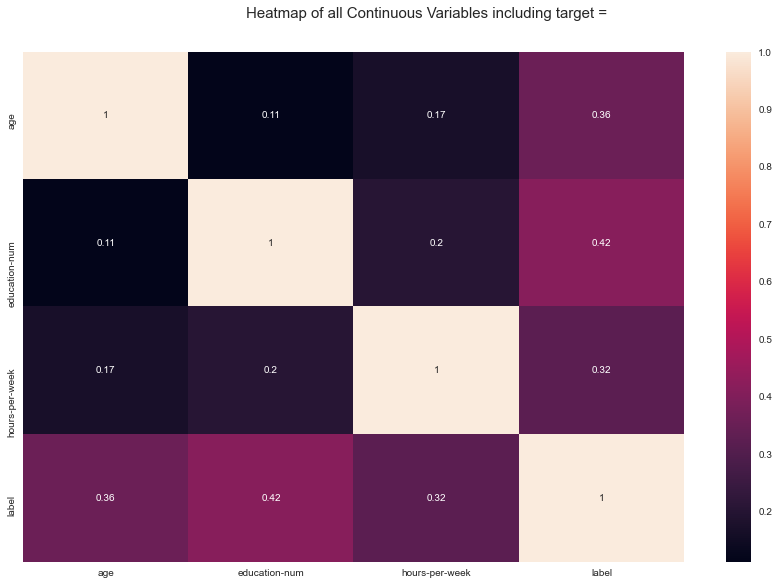

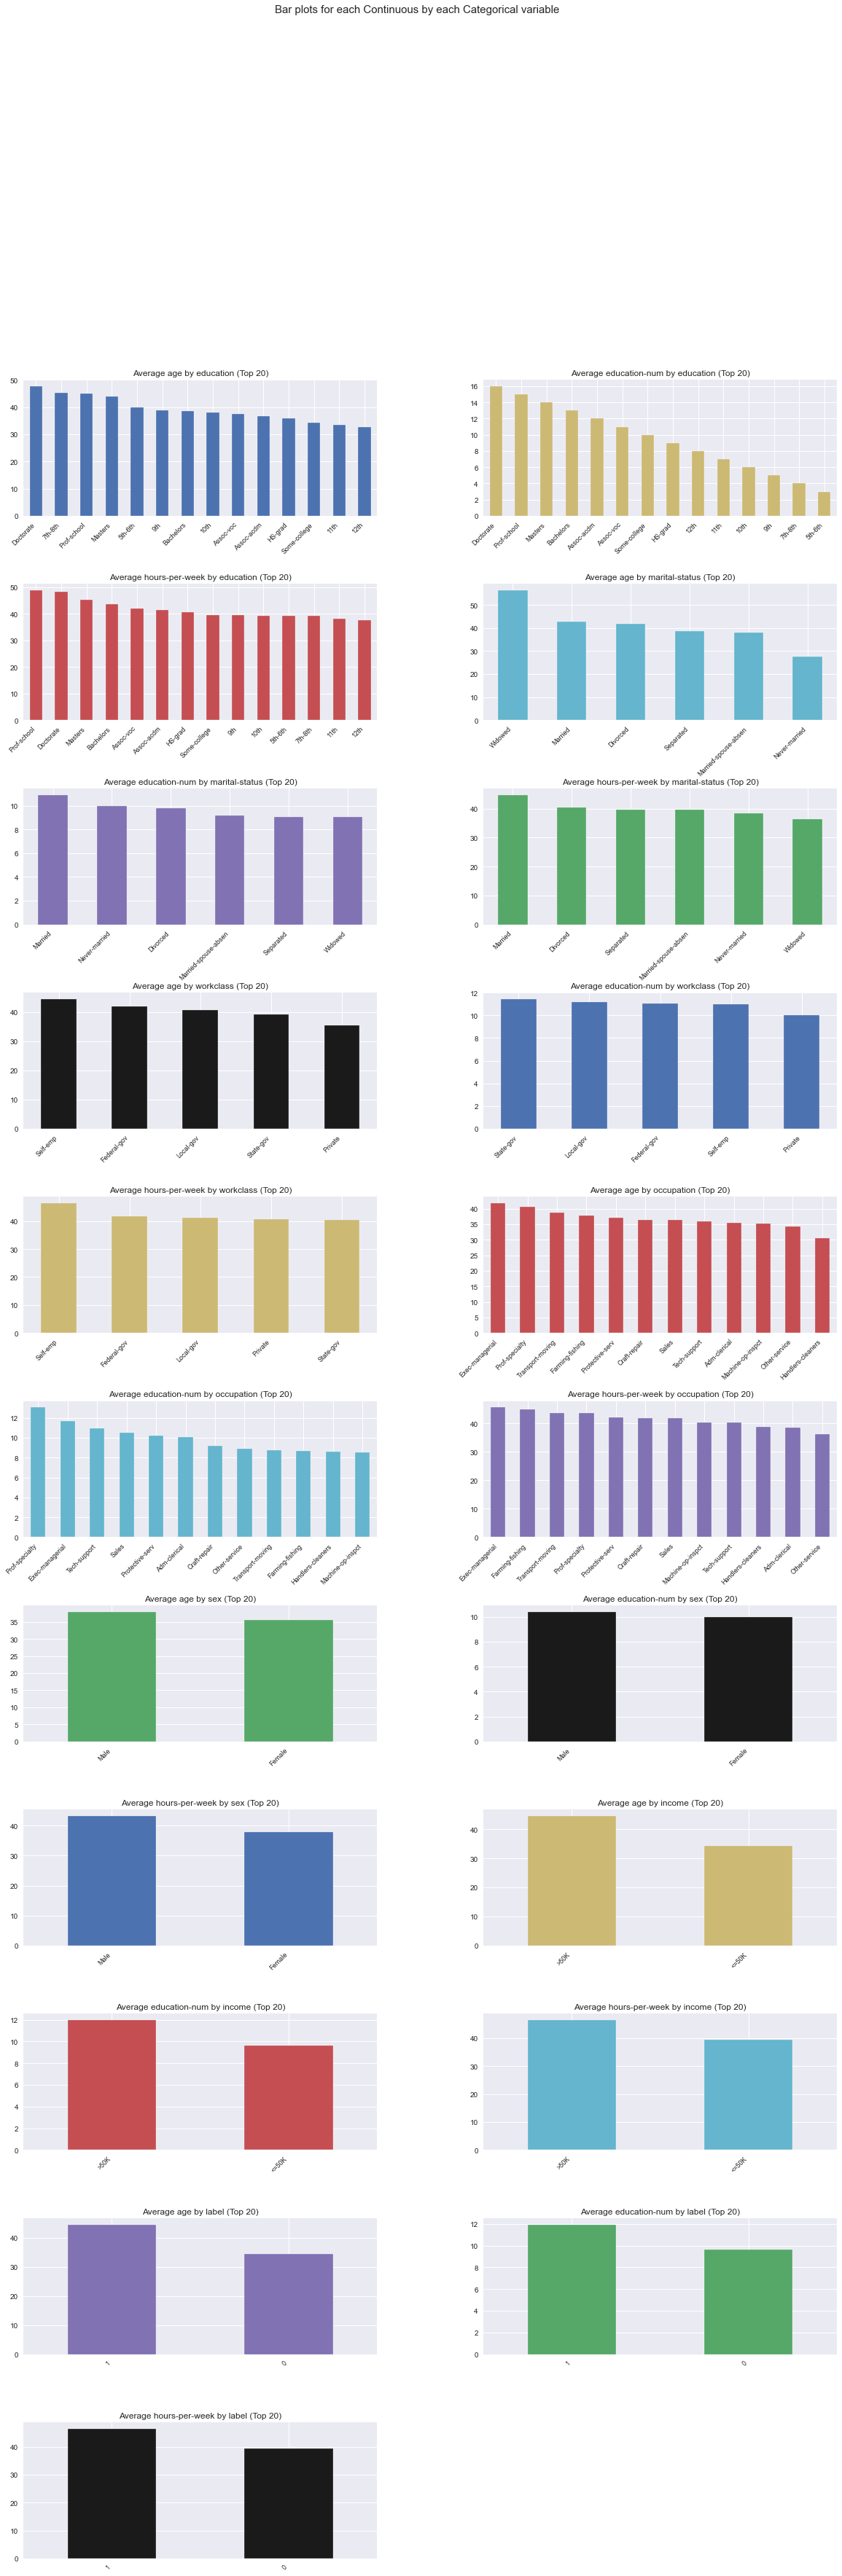

Time to run AutoViz (in seconds) = 33.516

 ###################### VISUALIZATION Completed ########################


In [2]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()
df = AV.AutoViz(r"D:\PyTorch for Deep Learning with Python Bootcamp\1. Course Overview, Installs, and Setup\PYTORCH_NOTEBOOKS\Data\income.csv")


In [3]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [4]:
df.drop(columns=['education-num','occupation','income'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   marital-status  30000 non-null  object
 4   workclass       30000 non-null  object
 5   hours-per-week  30000 non-null  int64 
 6   label           30000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [6]:
cat_col = ['sex','education','marital-status','workclass']
cont_col = ['age','hours-per-week']
# y = ['label']

In [7]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp', 'Federal-gov', 'State-gov'],
      dtype=object)

In [8]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Widowed', 'Separated',
       'Married-spouse-absent'], dtype=object)

In [9]:
df['marital-status'] = df['marital-status'].apply(lambda x: 'Married' if x in ['Married'] else 'Not_Married')
df['workclass'] = df['workclass'].apply(lambda x: 'Gov_Employed' if x in ['Local-gov','State-gov','Federal-gov'] else x)

In [10]:
for i in cat_col:
    df[i] = df[i].astype('category')

In [13]:
import numpy as np
import torch
import torch.nn as nn

In [14]:
cat_array = torch.LongTensor(np.stack([df[i].cat.codes.values for i in cat_col],axis = 1))
cat_array

tensor([[ 1, 10,  1,  1],
        [ 1, 11,  0,  0],
        [ 1, 10,  1,  2],
        ...,
        [ 1, 12,  0,  1],
        [ 0, 13,  1,  1],
        [ 1,  6,  0,  2]])

In [15]:
cont_array = torch.FloatTensor(np.stack([df[i].values for i in cont_col], axis = 1))
cont_array

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        ...,
        [47., 55.],
        [32., 40.],
        [33., 60.]])

In [16]:
embed_sz = [(len(df[i].unique()),min(50,(len(df[i].unique())+1)//2)) for i in cat_col]

In [17]:
embed_list = []
for i,j in embed_sz:
    embed_list.append(nn.Embedding(i,j))

In [18]:
embed = nn.ModuleList(embed_list)
embed

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(14, 7)
  (2): Embedding(2, 1)
  (3): Embedding(3, 2)
)

In [19]:
embedding = []
for i,e in enumerate(embed):
    embedding.append(e(cat_array[:4,i]))

In [20]:
class TabularModel(nn.Module):
    
    def __init__(self, embed_sz, n_cont, n_out, neuron_layer, prob = 0.5):
        super().__init__()
        self.embed = nn.ModuleList([nn.Embedding(i,j) for i,j in embed_sz])
        self.embed_drop = nn.Dropout(prob)
        self.batchnorm_cont = nn.BatchNorm1d(n_cont)
        
        num_embed = sum([j for i,j in embed_sz])
        n_input = num_embed + n_cont
        
        layerlist = []
        for i in neuron_layer:
            layerlist.append(nn.Linear(n_input,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(prob))
            n_input = i
        layerlist.append(nn.Linear(neuron_layer[-1], n_out))
        self.layers = nn.Sequential(*layerlist) # layer unpacking
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embed):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, axis = 1)
        x = self.embed_drop(x)
        x_cont = self.batchnorm_cont(x_cont)
        x = torch.cat([x,x_cont],axis = 1)
        x = self.layers(x)
        return x

In [21]:
model = TabularModel(embed_sz,cont_array.shape[1],2,[32,64,128])

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3)

In [39]:
train_size = int(len(df)*0.8)
test_size = int(len(df)*0.2)

In [44]:
train_cat = cat_array[:train_size]
test_cat = cat_array[train_size:]
train_cont = cont_array[:train_size]
test_cont = cont_array[train_size:]
y_train = torch.LongTensor(df['label'][:train_size].values).flatten()
y_test = torch.tensor(df['label'][train_size:].values).flatten()

In [46]:
epochs = 300
losses = []

for i in range(epochs):
    i = i+1
    
    y_pred = model(train_cat, train_cont)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%10 == 0:
        print(f'Epoch {i} loss is {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 10 loss is 0.726607084274292
Epoch 20 loss is 0.681941568851471
Epoch 30 loss is 0.6439306735992432
Epoch 40 loss is 0.616162896156311
Epoch 50 loss is 0.5953174233436584
Epoch 60 loss is 0.577772319316864
Epoch 70 loss is 0.5561829209327698
Epoch 80 loss is 0.5394951701164246
Epoch 90 loss is 0.5237390398979187
Epoch 100 loss is 0.5080918669700623
Epoch 110 loss is 0.49660196900367737
Epoch 120 loss is 0.4799230992794037
Epoch 130 loss is 0.47362393140792847
Epoch 140 loss is 0.4649200737476349
Epoch 150 loss is 0.4544290006160736
Epoch 160 loss is 0.44565483927726746
Epoch 170 loss is 0.4420408606529236
Epoch 180 loss is 0.43487247824668884
Epoch 190 loss is 0.42559194564819336
Epoch 200 loss is 0.42509883642196655
Epoch 210 loss is 0.4141818881034851
Epoch 220 loss is 0.4130233824253082
Epoch 230 loss is 0.41050857305526733
Epoch 240 loss is 0.4081045389175415
Epoch 250 loss is 0.4040936231613159
Epoch 260 loss is 0.4016021192073822
Epoch 270 loss is 0.4001077115535736
Epoch 2